In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [11]:
df.shape

(1000, 40)

In [13]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [15]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [38]:
df["authorities_contacted"].fillna("Unknown", inplace=True)

In [40]:
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

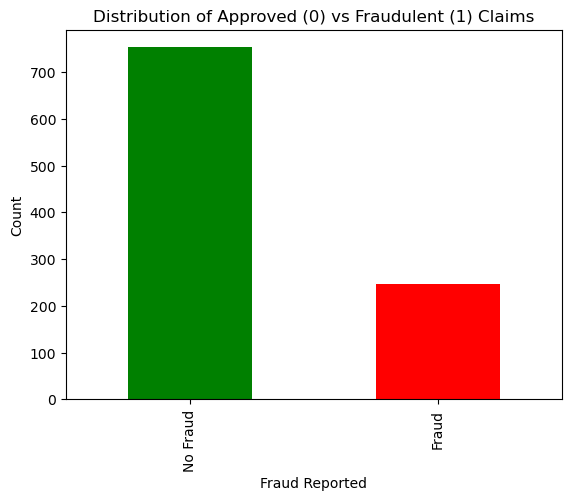

In [42]:
df['fraud_reported'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Approved (0) vs Fraudulent (1) Claims')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["No Fraud", "Fraud"])
plt.show()

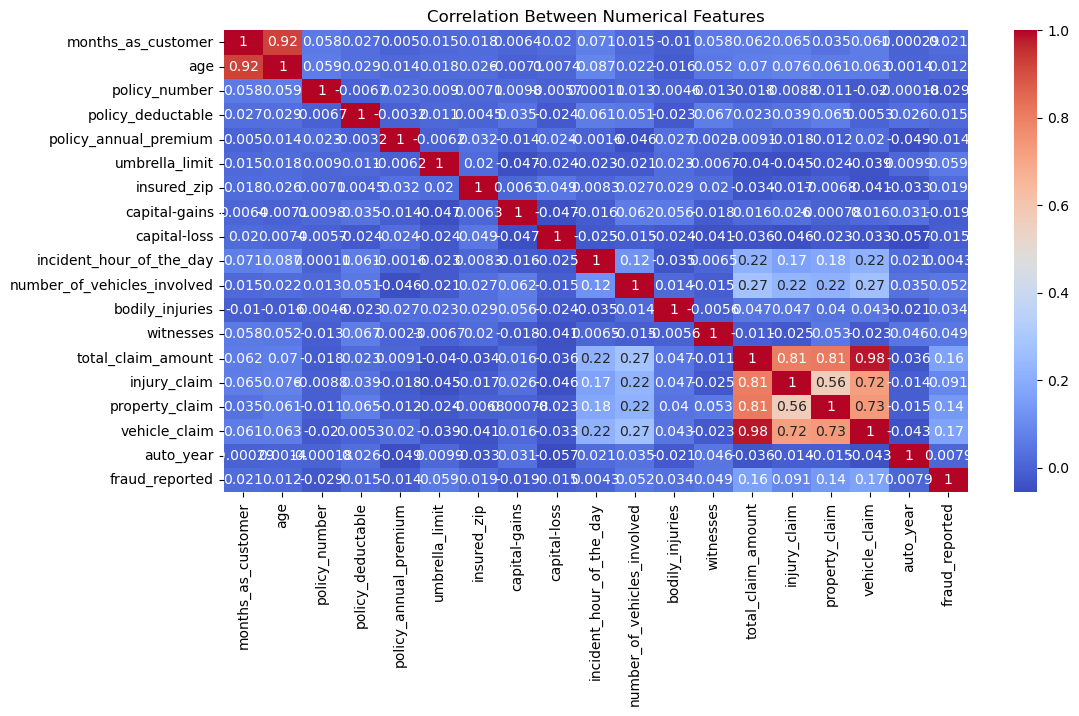

In [44]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


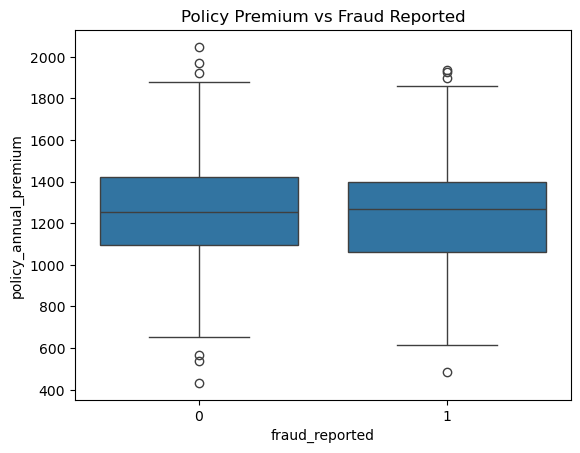

In [46]:
sns.boxplot(x='fraud_reported', y='policy_annual_premium', data=df)
plt.title('Policy Premium vs Fraud Reported')
plt.show()

In [66]:

cat_cols = df_encoded.select_dtypes(include='object').columns.tolist()


if 'fraud_reported' in cat_cols:
    cat_cols.remove('fraud_reported')


le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

if df_encoded['fraud_reported'].dtype == 'object':
    df_encoded['fraud_reported'] = df_encoded['fraud_reported'].map({'Y': 1, 'N': 0})

print(df_encoded.isnull().sum())

X = df_encoded.drop(columns='fraud_reported')
y = df_encoded['fraud_reported']

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 4: Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[145   0]
 [ 54   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       145
           1       1.00      0.02      0.04        55

    accuracy                           0.73       200
   macro avg       0.86      0.51      0.44       200
weighted avg       0.80      0.73      0.62       200

Accuracy Score: 0.73


In [58]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: fraud_reported
0    608
1    192
Name: count, dtype: int64
After SMOTE: fraud_reported
0    608
1    608
Name: count, dtype: int64


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[87 58]
 [30 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.66       145
           1       0.30      0.45      0.36        55

    accuracy                           0.56       200
   macro avg       0.52      0.53      0.51       200
weighted avg       0.62      0.56      0.58       200


Accuracy Score: 0.56


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

feature_names = df_encoded.drop('fraud_reported', axis=1).columns.tolist()
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)


scaler = StandardScaler()
scaler.fit(X)  # Fit on full X for use in Streamlit later

pickle.dump(rf, open("insurance_model.pkl", "wb"))
pickle.dump(scaler, open("insurance_scaler.pkl", "wb"))

Confusion Matrix:
 [[129  16]
 [ 44  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       145
           1       0.41      0.20      0.27        55

    accuracy                           0.70       200
   macro avg       0.58      0.54      0.54       200
weighted avg       0.65      0.70      0.66       200


Accuracy Score: 0.7
